# **Imports**


In [1]:
# Custom libraries
from tools.YOLODataLoader import YOLODataLoader
from tools.EDA import EDA
from tools.YOLOv9Trainer import YOLOv9Trainer
from tools.CNNEvaluator import CNNEvaluator


# Custom YOLO model
from models.YOLOv9Classifier import YOLOv9Classifier

In [2]:
import torch

print(torch.cuda.is_available())
print(torch.version.cuda)

False
12.1


# **Data Load**


In [3]:
# Инициализация YOLODataLoader с путями
yolo_loader = YOLODataLoader(
    train_dir="./db/train",
    val_dir="./db/valid",
    test_dir="./db/test",
    yaml_path="./db/data.yaml",
    batch_size=8,
    shuffle=True,
)

Classes loaded: ['door', 'cabinetDoor', 'refrigeratorDoor', 'window', 'chair', 'table', 'cabinet', 'couch', 'openedDoor', 'pole']


In [4]:
# Обновление путей в YAML
updated_yaml_path = yolo_loader.update_yaml_paths(
    yaml_path="./db/data.yaml",
    output_yaml_path="./db/updated_data.yaml",
)

YAML paths updated and saved to ./db/updated_data.yaml


In [5]:
print(f"Yolo DataLoader type: {type(yolo_loader)}")
print(f"Updated YAML path: {updated_yaml_path}")

Yolo DataLoader type: <class 'tools.YOLODataLoader.YOLODataLoader'>
Updated YAML path: ./db/updated_data.yaml


# **EDA**


In [6]:
eda = EDA(yolo_loader)

In [7]:
eda.show_dataset_statistics()

,door,cabinetDoor,refrigeratorDoor,window,chair,table,cabinet,couch,openedDoor,pole,Mode
0,473,3178,689,403,204,228,179,27,78,27,train
1,96,765,192,91,49,40,32,1,13,9,valid
2,34,179,2,63,87,47,52,58,20,8,test


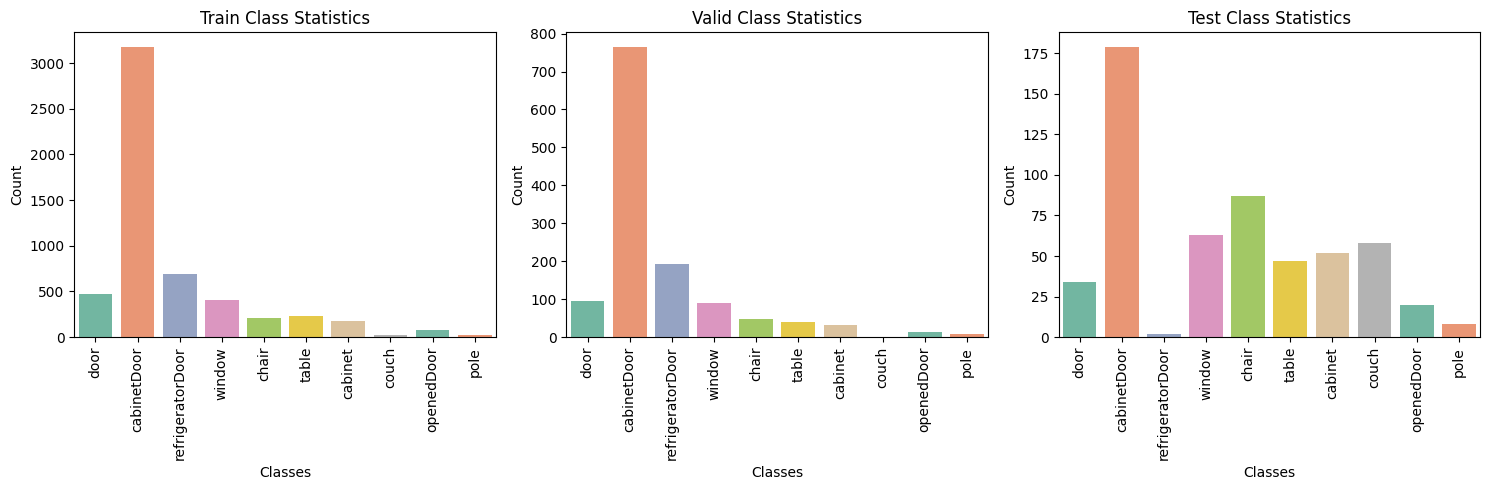

In [8]:
eda.plot_class_distribution()

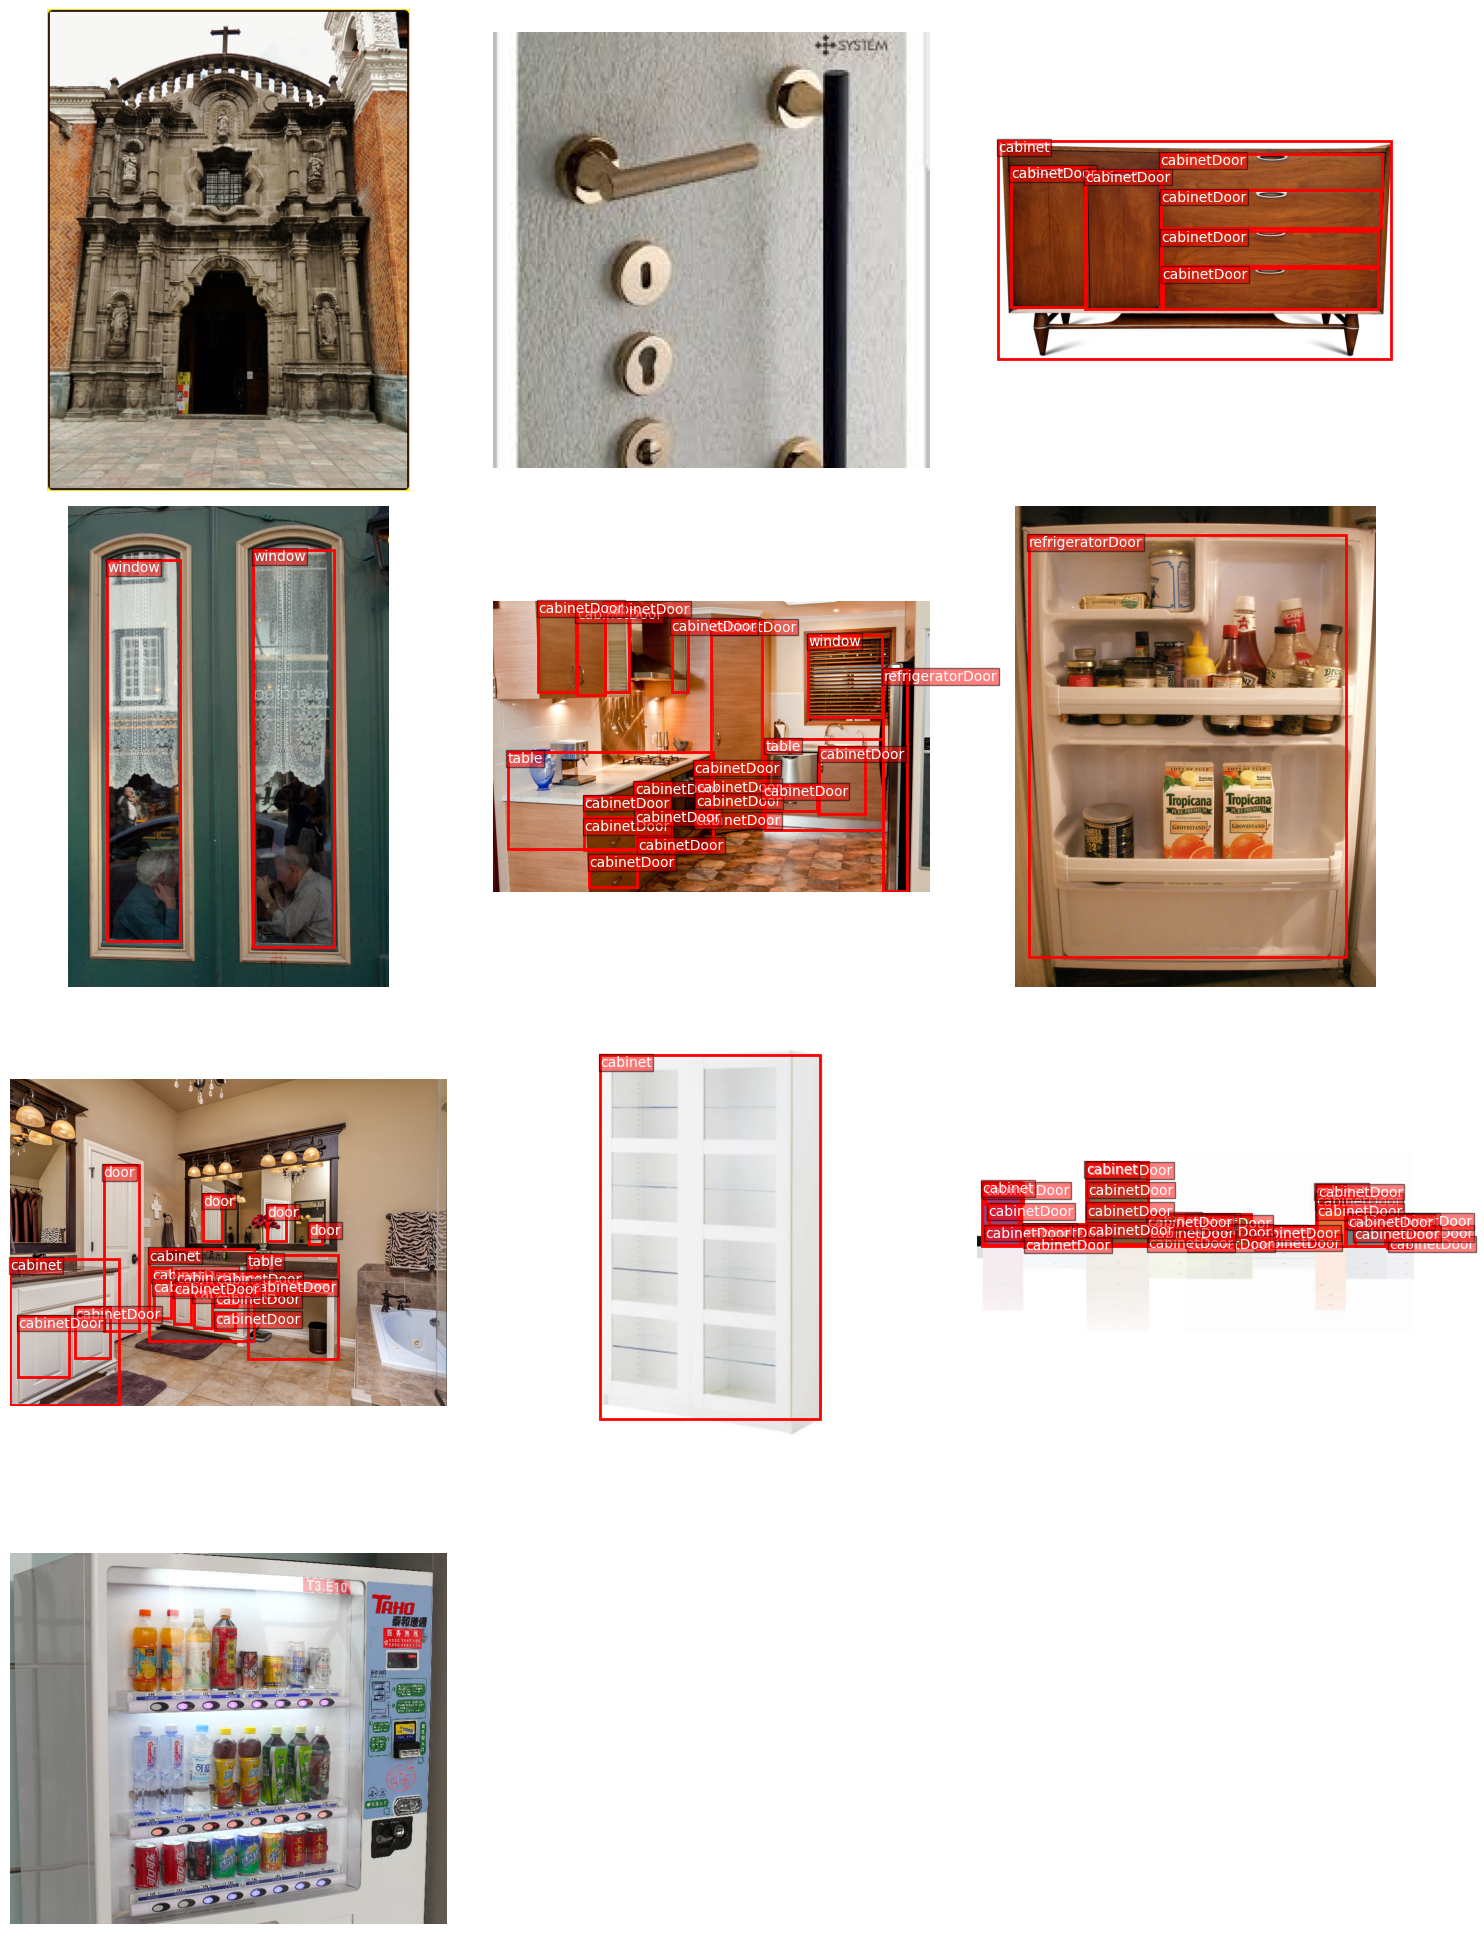

In [9]:
eda.show_sample_images(num_images=10, loader_type="train")

# **Modal Initialization**


In [10]:
yolo_model = YOLOv9Classifier(model_name="yolov9e.pt", random_state=42)

In [11]:
param_grid = {
    "epochs": [10],
    "batch_size": [16],
    "lr": [0.001],
}

In [12]:
models = {"yolo_model": yolo_model}
param_grids = {"yolo_model": param_grid}

# **Model Training**


In [13]:
trainer = YOLOv9Trainer(device="cuda")

In [16]:
trainer.train(models=models, param_grids=param_grids, data_yaml=updated_yaml_path)

Training on device: cpu


Total Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]


Training yolo_model with parameters: {'batch_size': 16, 'epochs': 10, 'lr': 0.001}
Ultralytics YOLOv8.2.98 🚀 Python-3.12.3 torch-2.4.1+cu121 CPU (13th Gen Intel Core(TM) i5-1340P)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=./db/updated_data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=(640, 640), save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning /home/nord/Documents/GitHub/goit-cv-hw8/src/db/train/labels... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:01<00:00, 780.24it/s]

train: New cache created: /home/nord/Documents/GitHub/goit-cv-hw8/src/db/train/labels.cache



val: Scanning /home/nord/Documents/GitHub/goit-cv-hw8/src/db/valid/labels... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 759.87it/s]


val: New cache created: /home/nord/Documents/GitHub/goit-cv-hw8/src/db/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


In [26]:
best_models = model_trainer.best_estimators
best_params = model_trainer.best_params
best_scores = model_trainer.best_scores
best_model_name = model_trainer.best_model_name

In [27]:
print(best_models)
print(best_params)
print(best_scores)
print(best_model_name)

{'cnn_model': <models.PyTorchCNNClassifier.PyTorchCNNClassifier object at 0x000002345AF647D0>}
{'cnn_model': {'activation_fn': 'ReLU', 'batch_size': 16, 'conv_layers': [(32, 3, 1, 1), (64, 3, 1, 1), (128, 3, 1, 1)], 'dropout_rate': 0.1, 'epochs': 10, 'hidden_sizes': [256, 128], 'lr': 0.001, 'optimizer_type': 'adam', 'pool_fn': 'AvgPool2d', 'pool_kernel_size': 2, 'pool_padding': 1, 'pool_stride': 2}}
{'cnn_model': 0.781744335185977}
cnn_model


# **Model Evaluator**


In [28]:
evaluator = CNNEvaluator()

In [29]:
evaluator.visualize_pipeline(model_name=best_model_name, best_models=best_models)

Visualizing the architecture of the model: cnn_model
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            896
├─ReLU: 1-2                              --
├─AvgPool2d: 1-3                         --
├─Conv2d: 1-4                            18,496
├─ReLU: 1-5                              --
├─AvgPool2d: 1-6                         --
├─Conv2d: 1-7                            73,856
├─ReLU: 1-8                              --
├─AvgPool2d: 1-9                         --
├─Flatten: 1-10                          --
├─Linear: 1-11                           27,558,144
├─ReLU: 1-12                             --
├─Dropout: 1-13                          --
├─Linear: 1-14                           32,896
├─ReLU: 1-15                             --
├─Dropout: 1-16                          --
├─Linear: 1-17                           774
Total params: 27,685,062
Trainable params: 27,685,062
Non-trainable params: 0


In [30]:
evaluator.display_results(
    test_dataset=transformed_test_dataset,
    best_models=best_models,
    best_params=best_params,
    best_scores=best_scores,
    best_model_name=best_model_name,
    help_text=True,
)

Validation Loss: 0.43439963827791445, Validation Accuracy: 0.836
Evaluation Metrics for Test Set:


,Model,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
0,cnn_model,0.836,0.839186,0.83615,0.841536,0.836



Best Parameters for Each Model (found during hyperparameter tuning):


,Model,activation_fn,batch_size,conv_layers,dropout_rate,epochs,hidden_sizes,lr,optimizer_type,pool_fn,pool_kernel_size,pool_padding,pool_stride
0,cnn_model,ReLU,16,"[(32, 3, 1, 1), (64, 3, 1, 1), (128, 3, 1, 1)]",0.1,10,"[256, 128]",0.001,adam,AvgPool2d,2,1,2



Overall Best Model and Score (based on cross-validation score):


,Overall Best Model,Score (based on cross-validation score)
0,cnn_model,0.781744



Metric Explanations for Classification:
Accuracy: The ratio of correctly predicted instances to the total instances.
Balanced Accuracy: The average of recall obtained on each class.
F1 Score: Harmonic mean of precision and recall.
Precision: Ratio of correctly predicted positive observations to all positive predictions.
Recall: Ratio of correctly predicted positive observations to all actual positives.


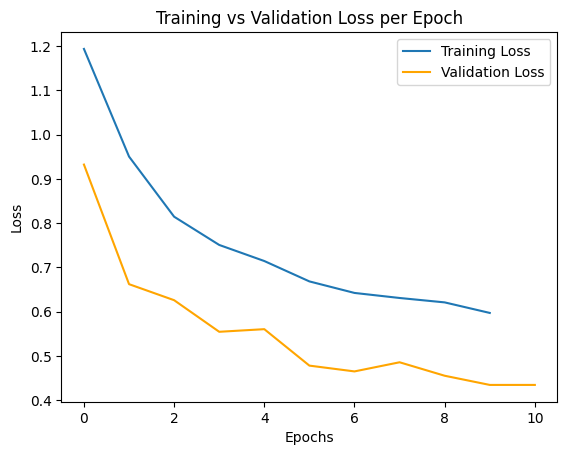

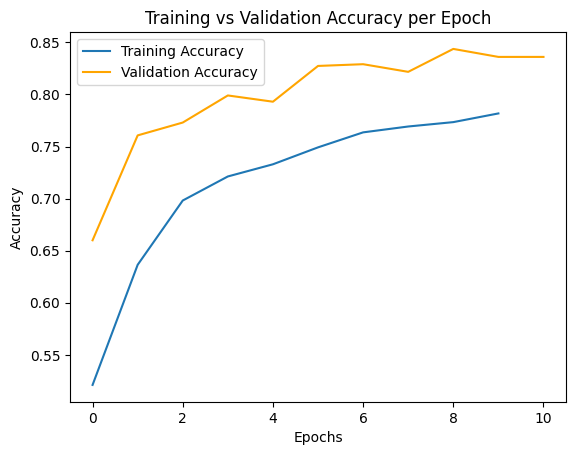

In [31]:
evaluator.plot_loss_history(best_models, best_model_name)
evaluator.plot_accuracy_history(best_models, best_model_name)

In [32]:
# evaluator.predict_on_val(
#     val_dataset=transformed_val_dataset,
#     best_models=best_models,
#     best_model_name=best_model_name,
# )

# **Key Conclusions:**

# **High Model Accuracy:**

**Validation Accuracy:** The model achieved a validation accuracy of 88.5%. This suggests that the model generalizes well to unseen data, predicting the correct outcomes in most cases during validation.

**Evaluation on Test Set:** The model achieved an accuracy of 0.885 on the test set. Furthermore, additional evaluation metrics such as:

**Balanced Accuracy:** 0.8860

**F1 Score:** 0.8840

**Precision:** 0.8882

**Recall:** 0.8850

These metrics indicate that the model performs consistently well across various evaluation aspects, demonstrating a strong balance between precision and recall.

# **Optimal Hyperparameters:**

**Best Architecture:** The optimal architecture consisted of 3 convolutional layers with the following configuration: [(32, 3, 1, 1), (64, 3, 1, 1), (128, 3, 1, 1)]. This design proved to be effective for feature extraction and subsequent classification tasks.

**Hyperparameter Tuning: The best model was obtained with:**

**Batch size:** 16
**Learning rate:** 0.001
**ReLU activation function**
**Adam optimizer**

The inclusion of a dropout rate of 0.1 helped to prevent overfitting during training. The model used AvgPooling (kernel size = 2, stride = 2, padding = 1) to reduce the spatial dimensions while preserving the most important features.

# **Regularization and Loss Function:**

**Regularization:** The use of dropout after each hidden layer (with a dropout rate of 0.1) proved effective in mitigating overfitting, acting as a regularization method by randomly dropping units during training. This added stochasticity helps to improve the model's generalization ability.

**Optimizer and Loss Function:** The Adam optimizer, combined with cross-entropy loss, was instrumental in effectively optimizing the model. This combination provided a balance between fast convergence and stable gradient updates.

# **Cross-Validation Score:**

The cross-validation score for the best model was 0.843, indicating strong generalization across different data splits. While the model performed well during both cross-validation and on the test set, there remains a small gap between training and validation scores, suggesting that further fine-tuning or additional regularization techniques could still offer marginal improvements.
